In [1]:
import pandas as pd
from brainclip.config import *
import os
import SimpleITK as sitk

parsed_reports_df = pd.read_csv(parsed_reports_ext)

,Unnamed: 0,ID,Dataset,StudyInstanceUID,ParsedImpressions,nlp_diagnosis,infarct,tumor,hemorrhage,others,normal,class
0,524,524,IN-BodyScanData-03,1.2.826.1.3680043.9.5282.150415.38559.80385592...,Multiple lacunar areas of acute infarct in the...,"infarct,loss of signal void,thrombosis,",1,0,0,0,0,infarct
1,923,923,IN-BodyScanData-03,1.2.826.1.3680043.9.5282.150415.67450.11067450...,Acute infarct in the right centrum semiovale. ...,"infarct,microangiopathy changes,atrophy,",1,0,0,0,0,infarct
2,793,793,IN-BodyScanData-03,1.2.826.1.3680043.9.5282.150415.30936.80309362...,Chronic ischemic small vessel changes in bilat...,"changes,infarcts,atrophy,hyperintensities,mast...",1,0,0,0,0,infarct
3,1027,1027,IN-BodyScanData-03,1.2.826.1.3680043.9.5282.150415.43331.11043331...,HYPERINTENSITY SEEN INVOLVING THE LEFT OCCIPIT...,"infarcts,atrophic changes,white matter hyperin...",1,0,0,0,0,infarct
4,597,597,IN-BodyScanData-03,1.2.826.1.3680043.9.5282.150415.17006.80170062...,Chronic ischaemic small vessel changes in bila...,"changes,infarcts,",1,0,0,0,0,infarct
...,...,...,...,...,...,...,...,...,...,...,...,...
257,907,907,IN-BodyScanData-03,1.2.826.1.3680043.9.5282.150415.13633.80136332...,No significant abnormality is seen in the brain.,NaN,0,0,0,0,1,normal
258,170,170,IN-BodyScanData-03,1.2.826.1.3680043.9.5282.150415.5992.110059922...,No significant abnormality is seen in the brai...,NaN,0,0,0,0,1,normal
259,922,922,IN-BodyScanData-03,1.2.826.1.3680043.9.5282.150415.45405.11045405...,No significant abnormality is seen in the brai...,NaN,0,0,0,0,1,normal
260,236,236,IN-BodyScanData-03,1.2.826.1.3680043.9.5282.150415.35454.11035454...,No significant abnormality is seen in the brain.,NaN,0,0,0,0,1,normal


In [36]:
def extract_info(basepath):
    r = []
    for img_path in os.listdir(basepath):
        img = sitk.ReadImage(os.path.join(basepath, img_path))
        spacing = img.GetSpacing()[:3]
        r.append(spacing)
    return pd.DataFrame(r, columns=["x","y","z"])

In [37]:
train = extract_info(train_data)
train["set"] = "train"

valid = extract_info(valid_data)
valid["set"] = "valid"

test = extract_info(test_data)
test["set"] = "test"

In [38]:
total = pd.concat([train,valid,test])

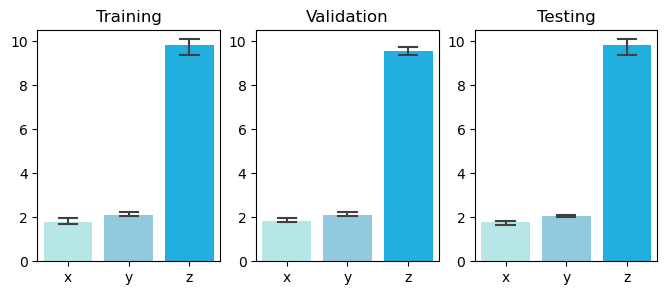

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = sns.color_palette(['paleturquoise', 'skyblue', 'deepskyblue'])
fig, ax = plt.subplots(1,3, figsize=(8,3))

for i, df in zip([0,1,2], [train,valid,test]):
    sns.barplot(df, ax=ax[i], 
        errorbar=("pi", 50), capsize=.3, errcolor=".25", errwidth=1.5,
        linewidth=0, edgecolor=".5", palette=custom_palette)

for i in range(3):
    ax[i].set_ylim(0, 10.5)

ax[0].set_title("Training")
ax[1].set_title("Validation")
ax[2].set_title("Testing")
plt.show()

In [56]:
total_l = []
for row in parsed_reports_df["ParsedImpressions"]:
    total_l.append( len(row) )

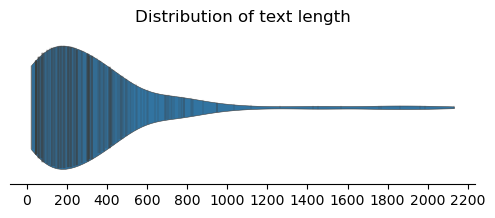

In [78]:
plt.figure(figsize=(6, 2))
sns.violinplot(total_l, orient="h", cut=0, inner="stick",linewidth=0.4)
plt.title("Distribution of text length")
plt.yticks([])
plt.xticks([i for i in range(0,2300, 200)])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)